# Introdução

**Objetivo:**

Este trabalho foi desenvolvido para a revolver o problema proposto no trabalho 2 de Aprendizado com a máquina, do professor Otávio Parraga. Implementamos por meio da biblioteca tensorflow/keras do python com redes neurais. O algoritmo utilizado é o CNN básico.

**Alunos:**  Isadora Ferreira Guerra (22104296), Rodrigo Rosa Renck (22106811), Leonardo Preczevski Ramos (22107134), Gustavo Canellas Aveline Rocha (22106369), Otávio De Carli Albuquerque (22106750)

# Bibliotecas e Dados

In [43]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
# SkLearn
from sklearn.model_selection import train_test_split

In [44]:
# Ler dataset
train = pd.read_csv("./train.csv")

# Analise do dataset

In [45]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  

In [46]:
# Separando x_train e y_train
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [47]:
print(X.shape)

(42000, 784)


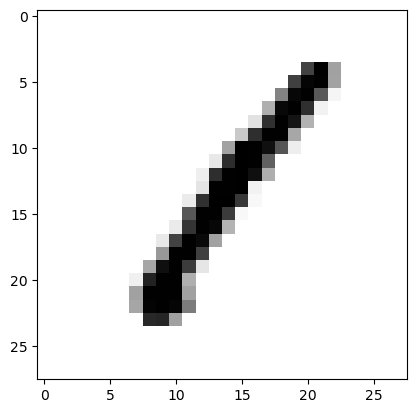

Label: 1


In [48]:
plt.imshow(X.values[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[0]))

# Pré-processamento dos dados

In [49]:
# Transformando a imagem 2d em um numpy array (imagem 28*28)
x = X.values.reshape(42000, 28, 28, 1)

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

#print(x[0])

In [50]:
# Vamos ajustar o formato da saida
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
# Separando uma parte para treino (90%) e outra para validação (10%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=5)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 37800
Qtde de validação: 4200


# Criando e treinando o Modelo

In [52]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Conv2D: Camada com kernels (filtros) que percorrem a imagem extraindo caracterísitcas (mapas de caracteísticas)
# MaxPooling2D: Camada que reduz a dimensionalidade dos mapas de características 2D
# Flatten: Camada que transforma um mapa de características 2D num vetor para classficador final
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 20)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 40)        7240      
                                                                 
 flatten_1 (Flatten)         (None, 4840)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                242050    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                      

In [53]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [54]:
# Treina com os parte dos dados
batch_size = 32
epochs = 10

#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
  71/1182 [>.............................] - ETA: 6:11 - loss: 0.9700 - accuracy: 0.6937

KeyboardInterrupt: 

# Analise do treinamento

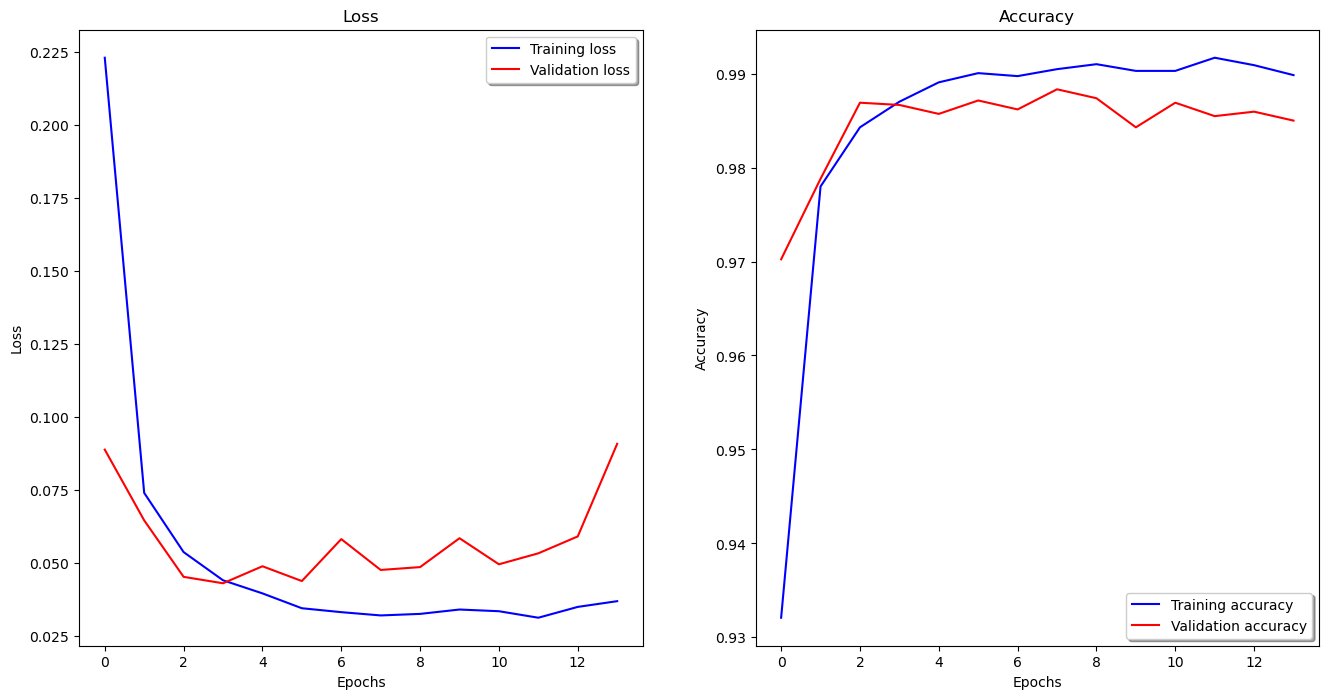

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot para o eixo da esquerda (perda - loss)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

# Plot para o eixo da direita (acurácia - accuracy)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()


In [39]:
from tensorflow.keras.models import load_model
# Salva o melhor modelo
model = load_model('model.h5')

# Testes

In [41]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3980785608291626
Test accuracy: 0.8519047498703003


In [23]:
# Testando uma entrada qualquer
import numpy as np

# Testando uma entrada qualquer
print(y_train[10])  # Classe real
print(model.predict(x_train[10].reshape((1, 28, 28, 1))))  # Probabilidades previstas

predicted_class = np.argmax(model.predict(x_train[10].reshape((1, 28, 28, 1))), axis=1)
print(predicted_class)  # Classe prevista


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 66ms/step
[[2.2280659e-08 4.8403757e-07 2.1399418e-07 3.2061864e-09 9.9925071e-01
  1.5536040e-06 6.1973650e-04 3.1140592e-06 1.2089019e-04 3.3550580e-06]]
1/1 [==============================] - 0s 222ms/step
[4]


# Avaliando o Modelo

In [24]:
import itertools

# Plot a confusão da matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Classificando toda a base de teste
y_pred = np.argmax(model.predict(x_val), axis=1)  # Obtendo as classes previstas
y_test_c = np.argmax(y_val, axis=1)  # Convertendo o formato one-hot para classes

# Nomes das classes (ajuste conforme necessário)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Matriz de confusão
cm = confusion_matrix(y_test_c, y_pred)
print("Confusion Matrix:")
print(cm)

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test_c, y_pred, target_names=target_names))


132/132 [==============================] - 1s 4ms/step
Confusion Matrix:
[[382   0   0   0   1  12   9   0  13   0]
 [  0 471   0   4   0   0   0   0   5   0]
 [ 15   3 316   9   5   0  30   4  25   1]
 [  5  10  11 339   0  23   3   8  36   2]
 [  0   3   0   0 307   1  16   1  13  50]
 [  7   9   1  16   2 295  12   1  31   3]
 [  3   9   3   0   4   4 386   0   4   0]
 [  3  12   6   1   2   1   0 401   8  16]
 [  0  18   0   5   0   6   4   4 344   0]
 [  9  12   1   6  23   2   1  33  22 337]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       417
           1       0.86      0.98      0.92       480
           2       0.93      0.77      0.85       408
           3       0.89      0.78      0.83       437
           4       0.89      0.79      0.84       391
           5       0.86      0.78      0.82       377
           6       0.84      0.93      0.88       413
           7       0.89      0.89      0

# Gerando Saída

Qtde de testes: 28000
875/875 [==============================] - 188s 215ms/step


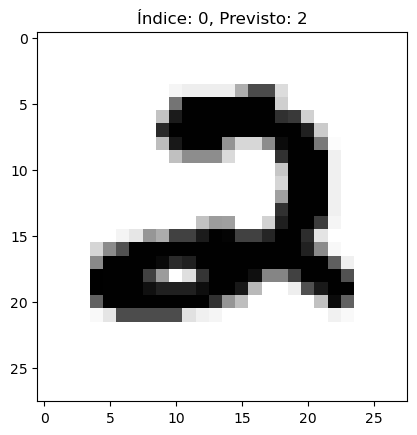

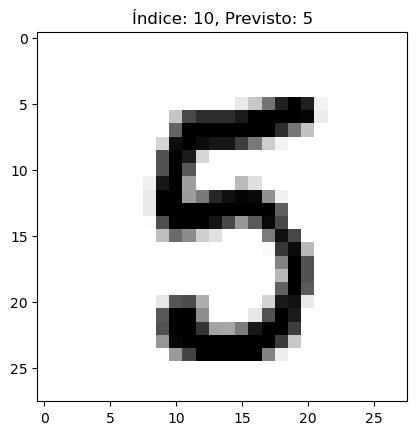

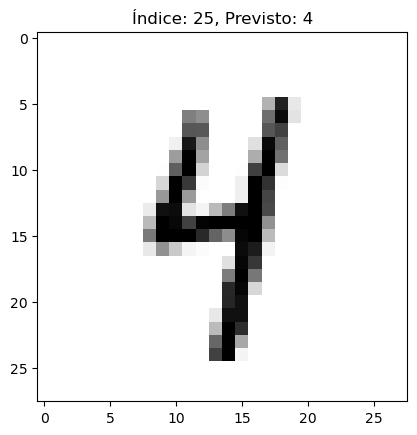

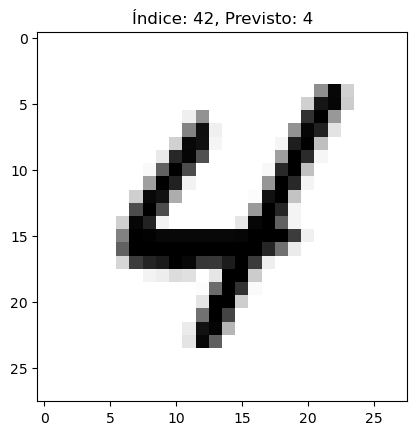

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [31]:
# Gerando saída para dataset de teste

#Carrega dataset de teste
test = pd.read_csv("./test.csv")
print("Qtde de testes: {}".format(len(test)))
# Bota no formato numpy e normaliza
x_test = test.values.reshape(len(test),28,28,1)
x_test = x_test.astype('float32')
x_test /= 255

# Faz classificação para dataset de teste
y_pred = np.argmax(model.predict(x_test), axis=1)

# Verificando algum exemplo
indices = [0, 10, 25, 42]  # Escolha os índices que deseja verificar
for i in indices:
    plt.imshow(test.values[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Índice: {i}, Previsto: {y_pred[i]}")
    plt.show()

# Botando no formato de saída
results = pd.Series(y_pred, name="Label")
submission = pd.concat([pd.Series(range(1, len(y_pred) + 1), name="ImageId"), results], axis=1)
print(submission.head())

# Salvando Arquivo
submission.to_csv("saida.csv", index=False)


# Exemplos de casos externos

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

caminho = './testes-externos/cinco.png'
testar_imagem_externa(caminho, model)

def testar_imagem_externa(caminho, modelo, num_classes=10):
    """
    Parâmetros:
        caminho_imagem (str): Caminho para a imagem no disco.
        modelo: O modelo treinado para realizar a previsão.
        num_classes (int): Número de classes do modelo.
    """
    # Carregar a imagem
    img = Image.open(caminho).convert('L')  # Converter para escala de cinza
    img = img.resize((28, 28))  # Redimensionar para 28x28 pixels
    
    # Visualizar a imagem carregada
    plt.imshow(img, cmap='gray')
    plt.title("Imagem carregada")
    plt.axis('off')
    plt.show()
    
    # Pré-processar a imagem
    img_array = np.array(img).astype('float32') / 255.0  # Normalizar os valores para [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Adicionar dimensões para batch e canais

    # Fazer a previsão
    previsoes = modelo.predict(img_array)
    classe_prevista = np.argmax(previsoes, axis=1)[0]

    print(f"Classe prevista: {classe_prevista}")
    print(f"Probabilidades para cada classe: {previsoes.flatten()}")


NameError: name 'testar_imagem_externa' is not defined